# 线性判别分析

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

iris = load_iris()  # 使用 scikit-learn 自带的 iris 数据集
X = iris.data
y = iris.target

# stratify 是为了保持 split 前类的分布。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0,
                                                    stratify=y)  # 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Coefficients:%s, intercept %s' % (lda.coef_, lda.intercept_))
print('Score: %.2f' % lda.score(X_test, y_test))

Coefficients:[[  6.575853     9.75807593 -14.34026669 -21.39076537]
 [ -1.98385061  -3.49791089   4.21495042   2.60304299]
 [ -4.47116022  -6.09542385   9.85886057  18.29330864]], intercept [-15.33097142   0.46730077 -30.53297367]
Score: 1.00


In [16]:
X = np.vstack((X_train, X_test))
y = np.vstack((y_train.reshape(y_train.size, 1), y_test.reshape(y_test.size, 1))).ravel()

In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
converted_X = np.dot(X, np.transpose(lda.coef_)) + lda.intercept_

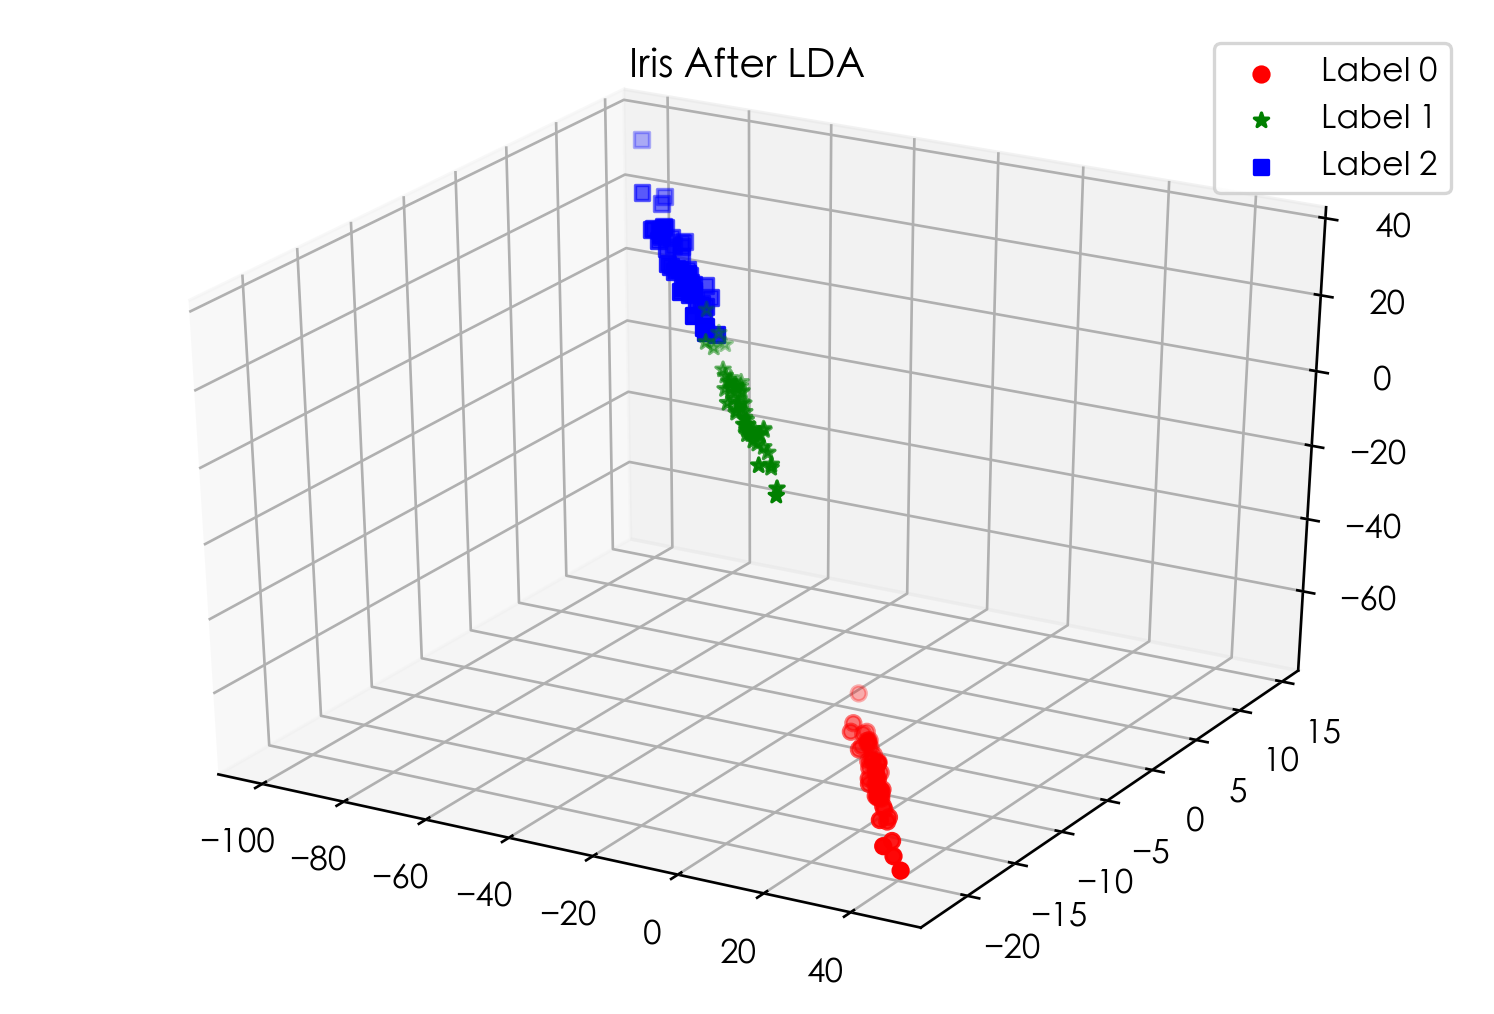

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=120)
ax = Axes3D(fig)
colors = 'rgb'
markers = 'o*s'
for target, color, marker in zip([0, 1, 2], colors, markers):
    pos = (y == target).ravel()
    X = converted_X[pos, :]
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=color, marker=marker,
               label="Label %d" % target)
ax.legend(loc="best")
fig.suptitle("Iris After LDA")
plt.show()

## 测试 LinearDiscriminantAnalysis 的预测性能随 solver 参数的影响

In [19]:
solvers = ['svd', 'lsqr', 'eigen']
for solver in solvers:
    if (solver == 'svd'):
        lda = LinearDiscriminantAnalysis(solver=solver)
    else:
        lda = LinearDiscriminantAnalysis(solver=solver,shrinkage=None)
    lda.fit(X_train, y_train)
    print('Score at solver=%s: %.2f' % (solver, lda.score(X_test, y_test)))

Score at solver=svd: 1.00
Score at solver=lsqr: 1.00
Score at solver=eigen: 1.00


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## 测试  LinearDiscriminantAnalysis 的预测性能随 shrinkage 参数的影响

In [23]:
shrinkages = np.linspace(0.0, 1.0, num=20)
shrinkages

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

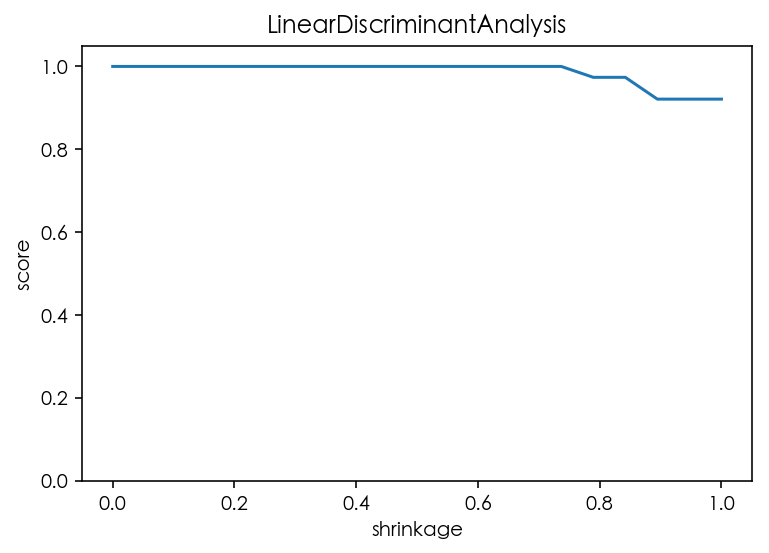

In [22]:

scores = []
for shrinkage in shrinkages:
    lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage)
    lda.fit(X_train, y_train)
    scores.append(lda.score(X_test, y_test))
## 绘图
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(shrinkages, scores)
ax.set_xlabel(r"shrinkage")
ax.set_ylabel(r"score")
ax.set_ylim(0, 1.05)
ax.set_title("LinearDiscriminantAnalysis")
plt.show()

## 